# LOGISTIC REGRESSION MODEL

#### 1) Load Dataset

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# load dataset
data = pd.read_csv("dataset/weather_data.csv", header=None)

X = np.array(data[[1,3]])
y = np.array(data[5])

In [22]:
# function to plot ploints
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    plt.title("Distribution of Dataset for logistic regression")
    plt.xlabel("X1 axis")
    plt.ylabel("X2 axis")
    plt.show()

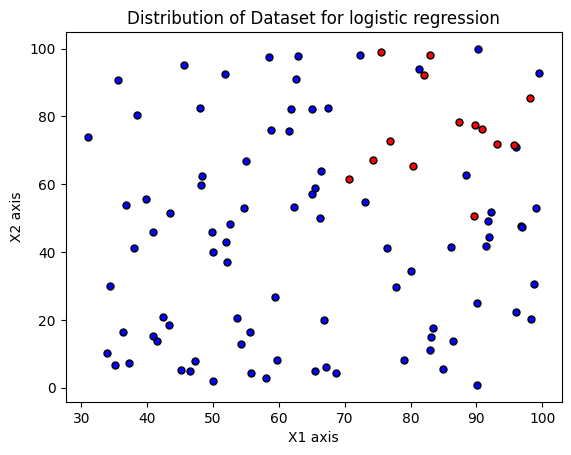

In [23]:
plot_points(X,y)

#### 2) Implementing the basic functions

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula: Linear combination

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function: Cross entropy Loss

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

- The function that updates the weights

$$ w_i \longleftarrow w_i + \eta (y - \hat{y}) x_i$$

$$ b \longleftarrow b + \eta (y - \hat{y})$$

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y * np.log(output) - (1 - y) * np.log(1 - output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [34]:
# plot decision boundary
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

#### 3) Training process

In [36]:
np.random.seed(0)

# define #iterations and learning rate
epochs = 100
learnrate = 0.01

# function to train model
def train(features, targets, epochs, learnrate, graph_lines=False):    
    errors = []
    n_samples, n_features = features.shape
    last_loss = None

    # initialize weights and biases 
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    # iterative process of training
    for e in range(epochs):
        # delta_w
        del_w = np.zeros(weights.shape)

        # gradient descencent algorithm
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # calculate final loss by epoch
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

        # show results
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            # check treshold
            predictions = out > 0.5            
            # calculate accuracy
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)

        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  11.399511076097532
Accuracy:  0.86

========== Epoch 10 ==========
Train loss:  15.51622952723511   WARNING - Loss Increasing
Accuracy:  0.86

========== Epoch 20 ==========
Train loss:  11.71854968932812
Accuracy:  0.86

========== Epoch 30 ==========
Train loss:  15.513704909982154   WARNING - Loss Increasing
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  16.884410844853647   WARNING - Loss Increasing
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  10.297546938823611
Accuracy:  0.86

========== Epoch 60 ==========
Train loss:  16.1479555136519   WARNING - Loss Increasing
Accuracy:  0.86

========== Epoch 70 ==========
Train loss:  18.326831043463216   WARNING - Loss Increasing
Accuracy:  0.86

========== Epoch 80 ==========
Train loss:  15.143457405533576
Accuracy:  0.86

========== Epoch 90 ==========
Train loss:  12.129163625676888
Accuracy:  0.86


C:\Users\bogdan\AppData\Local\Temp\ipykernel_11376\3458630906.py:8: RuntimeWarning: divide by zero encountered in log
  return - y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\bogdan\AppData\Local\Temp\ipykernel_11376\3458630906.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  return - y * np.log(output) - (1 - y) * np.log(1 - output)


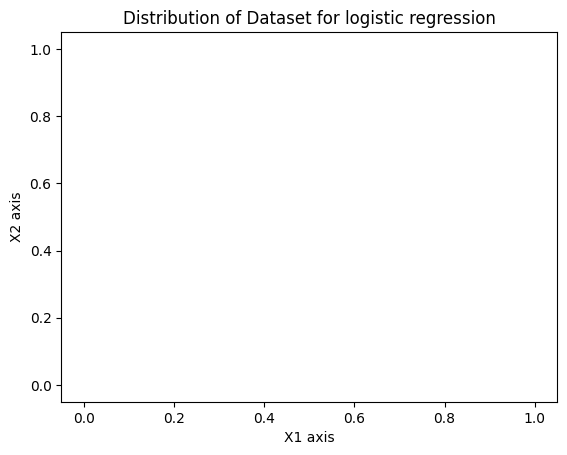

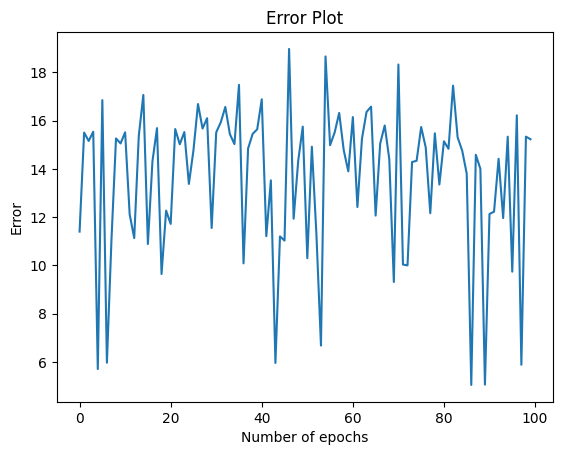

In [37]:
train(X,y,epochs, learnrate)